In [4]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
events_dict = {
    'BLUE: first_blood': 0,
    'BLUE: dragon': 1,
    'BLUE: herald': 2,
    'BLUE: first_tower_top': 3,
    'BLUE: first_tower_mid': 4,
    'BLUE: first_tower_bot': 5,
    'BLUE: second_tower_top': 6,
    'BLUE: second_tower_mid': 7,
    'BLUE: second_tower_bot': 8,
    'BLUE: third_tower_top': 9,
    'BLUE: third_tower_mid': 10,
    'BLUE: third_tower_bot': 11,
    'BLUE: inhibitor_top': 12,
    'BLUE: inhibitor_mid': 13,
    'BLUE: inhibitor_bot': 14,
    'BLUE: baron': 15,
    'BLUE: elder_dragon': 16,
    'BLUE: nexus_tower': 17,
    'BLUE: nexus': 18,
    'RED: first_blood': 19,
    'RED: dragon': 20,
    'RED: herald': 21,
    'RED: first_tower_top': 22,
    'RED: first_tower_mid': 23,
    'RED: first_tower_bot': 24,
    'RED: second_tower_top': 25,
    'RED: second_tower_mid': 26,
    'RED: second_tower_bot': 27,
    'RED: third_tower_top': 28,
    'RED: third_tower_mid': 29,
    'RED: third_tower_bot': 30,
    'RED: inhibitor_top': 31,
    'RED: inhibitor_mid': 32,
    'RED: inhibitor_bot': 33,
    'RED: baron': 34,
    'RED: elder_dragon': 35,
    'RED: nexus_tower': 36,
    'RED: nexus': 37
}

n_in = 3
df = pd.read_csv('data/clean-one-line.csv')
df = df.drop('golId', axis=1)
data = df.values.tolist()

for game in data:
    for i, s in enumerate(game):
        if s in events_dict:
            game[i] = events_dict.get(s)

sequence = [b for b in data if not(isinstance(b, float))]
sequence = [[x for x in y if not np.isnan(x)] for y in sequence]

In [6]:
def splitSequence(games, n_steps_in, n_steps_out=1):
    X, Y = [], []
    
    for sequence in games:
        for i in range(len(sequence)):
            # find the end of this pattern
            end_ix = i + n_steps_in
            out_end_ix = end_ix + n_steps_out
            # check if we are beyond the sequence
            if out_end_ix > len(sequence):
                break
            # gather input and output parts of the pattern
            seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
            X.append(seq_x)
            Y.append(seq_y)
	
    return X, Y

In [7]:
x_train, x_test = train_test_split(sequence,test_size=0.15,random_state=42, shuffle=False)
len(x_train)

2868

In [8]:
train, y_train = splitSequence(x_train, n_in)

In [9]:
test, y_test = splitSequence(x_test, n_in)

In [10]:
df_test = pd.DataFrame({'event_1': [],
                   'event_2': [],
                   'event_3': [],
                   'target': []})

df_train = pd.DataFrame({'event_1': [],
                   'event_2': [],
                   'event_3': [],
                   'target': []})

In [11]:
for index,test_row in enumerate(test):
    event_1 = test_row[0]
    event_2 = test_row[1]
    event_3 = test_row[2]
    df_test.loc[len(df_test.index)] = [event_1, event_2, event_3, y_test[index][0]]

In [12]:
y_test = df_test['target'].copy()
X_test = df_test.drop(['target'],axis=1)
df_test

,event_1,event_2,event_3,target
0,0.0,2.0,5.0,1.0
1,2.0,5.0,1.0,3.0
2,5.0,1.0,3.0,4.0
3,1.0,3.0,4.0,2.0
4,3.0,4.0,2.0,6.0
...,...,...,...,...
10708,26.0,34.0,5.0,29.0
10709,34.0,5.0,29.0,32.0
10710,5.0,29.0,32.0,36.0
10711,29.0,32.0,36.0,36.0


In [13]:
for index, train_row in enumerate(train):
    event_1 = train_row[0]
    event_2 = train_row[1]
    event_3 = train_row[2]
    df_train.loc[len(df_train.index)] = [event_1, event_2, event_3, y_train[index][0]]

In [14]:
y_train = df_train['target'].copy()
X_train = df_train.drop(['target'],axis=1)
y_train

0         1.0
1         3.0
2        24.0
3         2.0
4        23.0
         ... 
60297    10.0
60298    20.0
60299    13.0
60300    17.0
60301    18.0
Name: target, Length: 60302, dtype: float64

In [15]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.295
Accuracy score (validation): 0.298
Learning rate:  0.075
Accuracy score (training): 0.302
Accuracy score (validation): 0.306
Learning rate:  0.1
Accuracy score (training): 0.314
Accuracy score (validation): 0.319
Learning rate:  0.25
Accuracy score (training): 0.335
Accuracy score (validation): 0.341
Learning rate:  0.5
Accuracy score (training): 0.018
Accuracy score (validation): 0.018
Learning rate:  0.75
Accuracy score (training): 0.016
Accuracy score (validation): 0.015
Learning rate:  1
Accuracy score (training): 0.005
Accuracy score (validation): 0.004


In [16]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[  0   2   1 ...   0   0   0]
 [  0 388  14 ...   0  11   2]
 [  0  83  22 ...   0   0   0]
 ...
 [  0   4   0 ...   0  18   1]
 [  0   0   0 ...   0 418   2]
 [  0   0   0 ...   0  18 209]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.22      0.42      0.29       929
         2.0       0.15      0.07      0.10       309
         3.0       0.24      0.16      0.19       446
         4.0       0.26      0.15      0.19       430
         5.0       0.21      0.22      0.22       452
         6.0       0.33      0.02      0.03       237
         7.0       0.25      0.17      0.20       318
         8.0       0.28      0.05      0.08       272
         9.0       0.33      0.28      0.30       109
        10.0       0.31      0.19      0.24       250
        11.0       0.39      0.29      0.33       167
        12.0       0.68      0.70      0.69       103
        13.

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

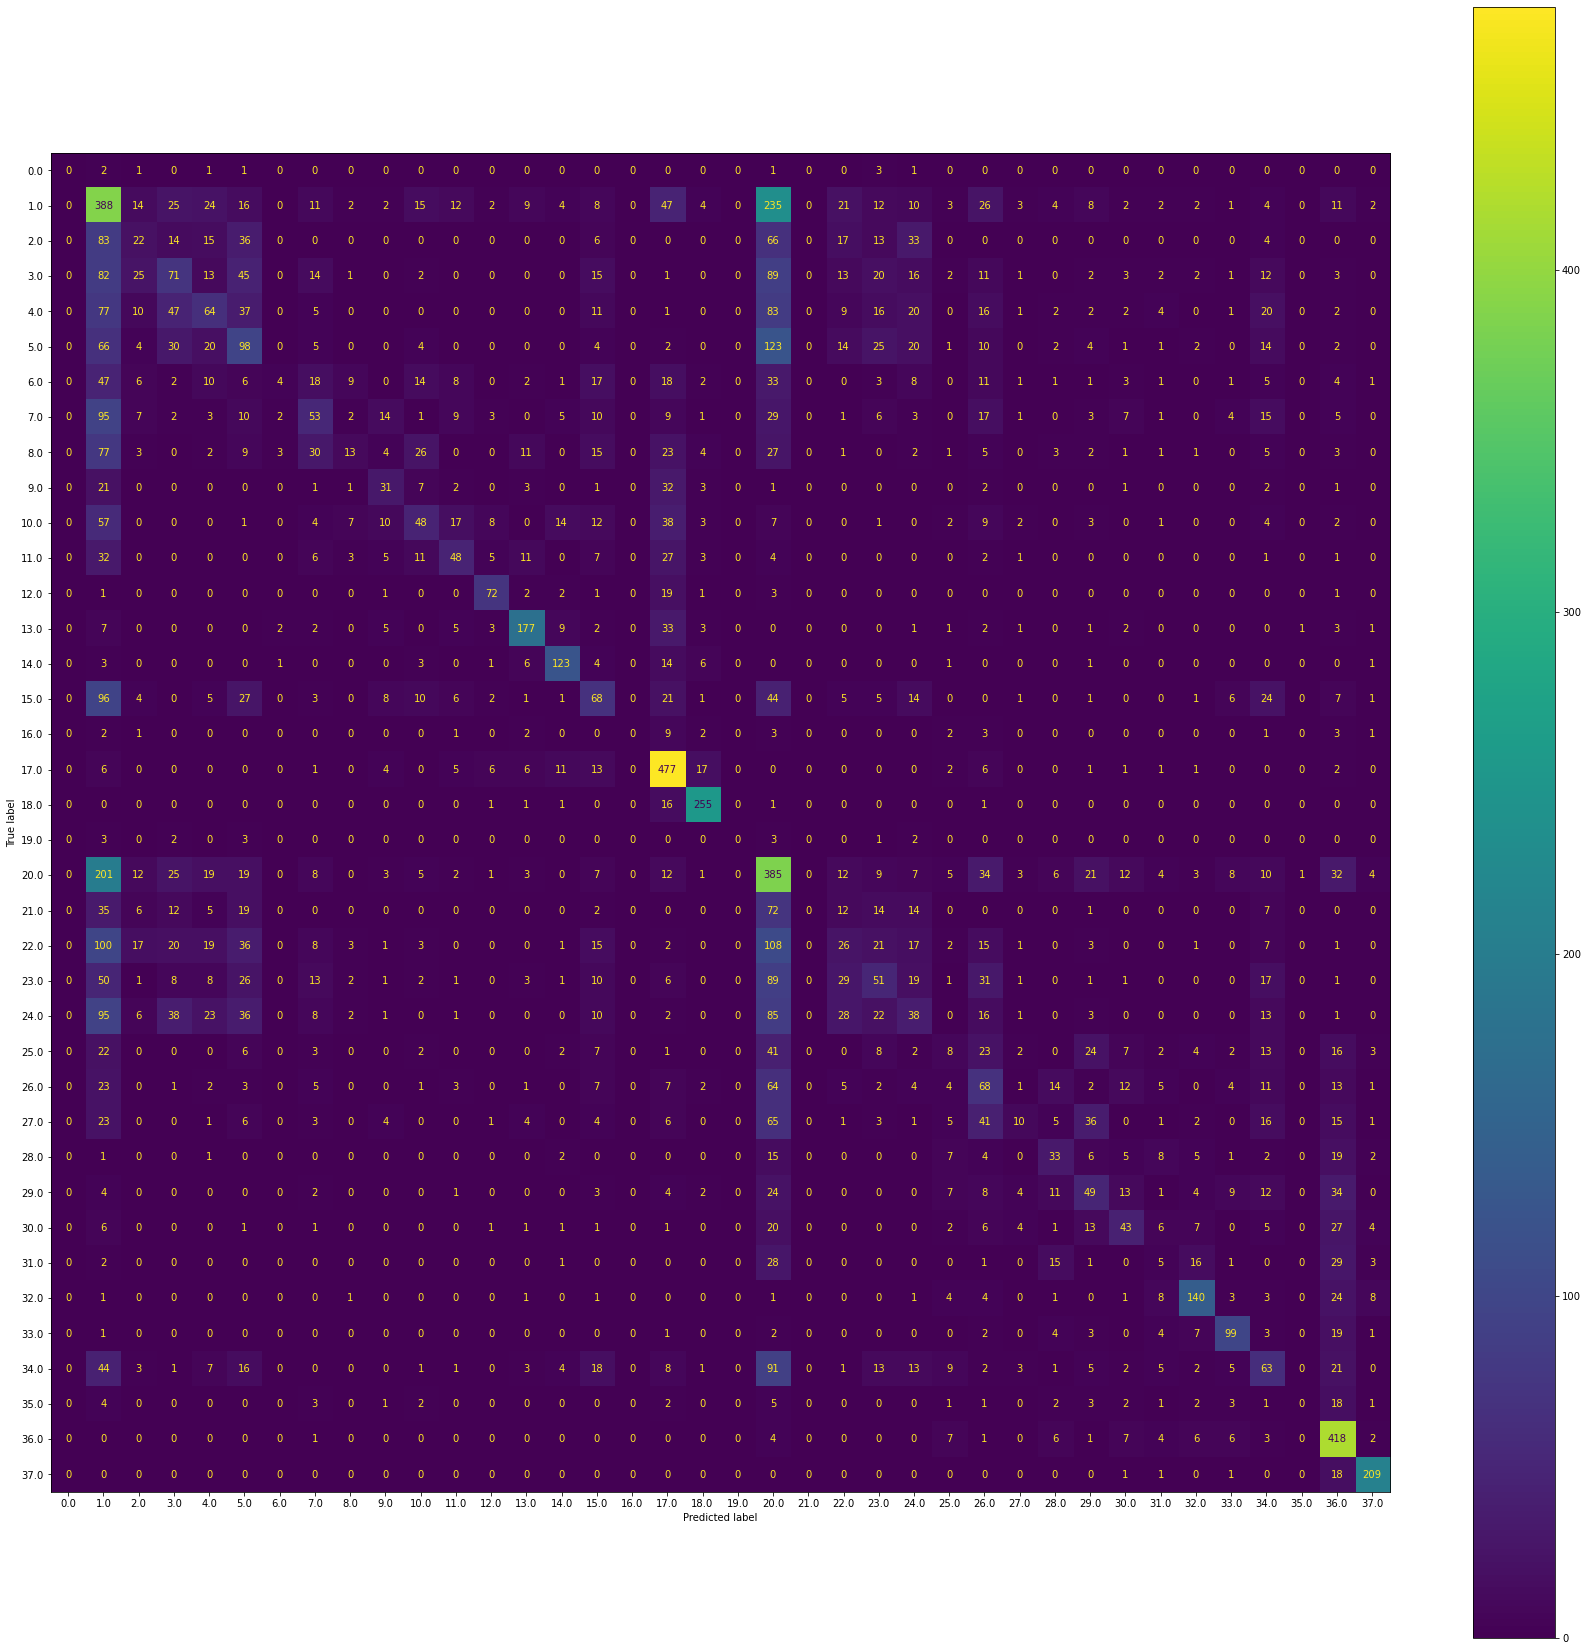

In [18]:
ig, ax = plt.subplots(figsize=(30, 30))
plot_confusion_matrix(gb_clf2, X_test, y_test, ax=ax)